# Regresión logística
El dataset clasifica una planta de la familia iris en tres tipos dependiendo de la longitud (columna 2) y ancho del pétalo (columna 3):
- 0: Iris-Setosa
- 1: Iris-Versicolor
- 2: Iris-Virginica

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

Primero probamos con dos clases y una característica: el ancho del pétalo

In [4]:
import numpy as np
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int32) # 1 if Iris virginica, else 0

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) aplica penalización l2 por defecto con C = 1.0. Para no utilizar regularización ponemos un valor de C muy alto

In [5]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

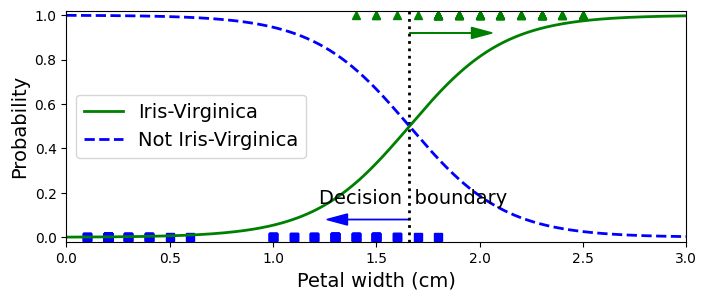

In [16]:
import matplotlib.pyplot as plt
# X_new es una matriz columna
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
# Una fila para cada dato y dos columnas, la primera es la probabilidad de que su etiqueta sea 0
# la segunda columna es la probabilidad de que su etiqueta sea 1
y_proba = log_reg.predict_proba(X_new)
# Primer elemento de la lista de muestras clasificada como 1, es un array de un elemento con .item lo convierto a un escalar
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0].item()

plt.figure(figsize=(8, 3))
plt.plot(X[y == 0], y[y == 0], "bs")
plt.plot(X[y == 1], y[y == 1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary + 0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
# save_fig("iris-logreg-1d.pdf")
plt.show()

Añadimos una característca más: la longitud del pétalo

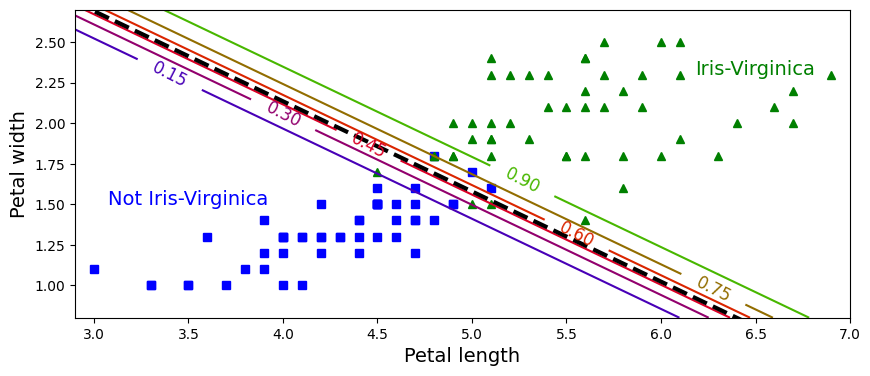

In [18]:
X = iris["data"][:, (2, 3)]  # petal length, petal width

log_reg = LogisticRegression(C=1000)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
# save_fig("iris-logreg-2d-2class.pdf")
plt.show()

Vamos ahora con las tres clases a hacer una regresión logística multinomial usando softmax

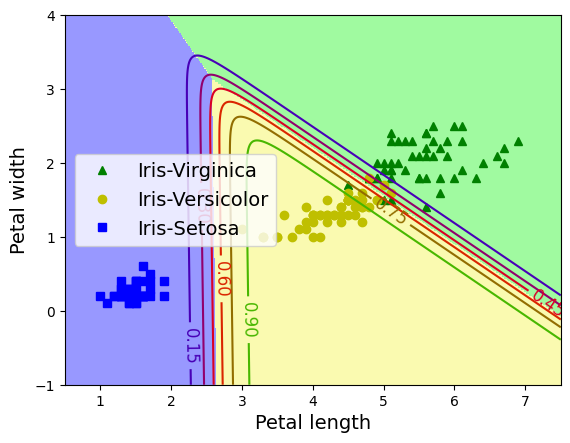

In [21]:
# Now use 2 features and all 3 classes
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty="none")
softmax_reg = LogisticRegression(solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
    np.linspace(0.5, 7.5, 500).reshape(-1, 1),
    np.linspace(-1, 4, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure()
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris-Versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Iris-Setosa")

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#9898ff", "#fafab0", "#a0faa0"])
# custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0']
# custom_cmap = ListedColormap(sns.color_palette())

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
# plt.axis([0, 7, 0, 3.5])
# save_fig("iris-logreg-2d-3class.pdf")
plt.show()

Vamos a hacer ahora una predicción de las probabilidades para un punto

In [22]:
# Get predictive distribution for a single example
X = [[5, 2]]  # (1,2) array
y_probs = softmax_reg.predict_proba(X)
print(np.round(y_probs, 2))

[[0.   0.06 0.94]]


Por último vamos a entrenar en un conjunto de entrenamiento separado

In [24]:
# Fit model and evaluate on separate test set

from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features to make problem harder
# X = iris.data # use all data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', penalty='none')
logreg = LogisticRegression(solver="lbfgs", C=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
errs = y_pred != y_test
nerrs = np.sum(errs)
print("Made {} errors out of {}, on instances {}".format(nerrs, len(y_pred), np.where(errs)))
# With ndims=2: Made 10 errors out of 50, on instances
#  (array([ 4, 15, 21, 32, 35, 36, 40, 41, 42, 48]),)


from sklearn.metrics import zero_one_loss

err_rate_test = zero_one_loss(y_test, y_pred)
assert np.isclose(err_rate_test, nerrs / len(y_pred))
err_rate_train = zero_one_loss(y_train, logreg.predict(X_train))
print("Error rates on train {:0.3f} and test {:0.3f}".format(err_rate_train, err_rate_test))

Made 10 errors out of 50, on instances (array([ 4, 15, 21, 32, 35, 36, 40, 41, 42, 48]),)
Error rates on train 0.180 and test 0.200
